## 이미지 분류 연습문제
- fashion_mnist 데이터 세트 사용
- 다중 클래스 분류   
- 0번 노트에서 진행했던 데이터에 대하여 아래 순서에 따라 모델링 진행해 보기
- 층 2개 이상 사용
- 중간층(은닉층) 출력은 임의로 구성
- 시각화로 검증, 학습 내용 비교
- 모델 저장/로드 후예측 진행
- pdf로 진행(jupyter lab 사용 가능한 경우)
- 일반 노트북으로 제출

### 이미지 분류 작업
- (1) 데이터 준비
- (2) 이미지 데이터 전처리 / 시각화
- (3) 모델링
- (4) 결과 시각화  
- (5) 모델 저장 / 로드
- (6) 예측 

In [1]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# 데이터 로드 
from keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

In [5]:
# 데이터 확인
X_train.shape    # (60000, 28, 28)
X_test.shape     # (10000, 28, 28)
y_train.shape    # (60000,)
y_test.shape     # (10000,)

(60000, 28, 28)

(10000, 28, 28)

(60000,)

(10000,)

In [6]:
np.min(X_train)    
np.max(X_train)

np.uint8(0)

np.uint8(255)

In [7]:
y_train[:10]
y_train[3]

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

np.uint8(3)

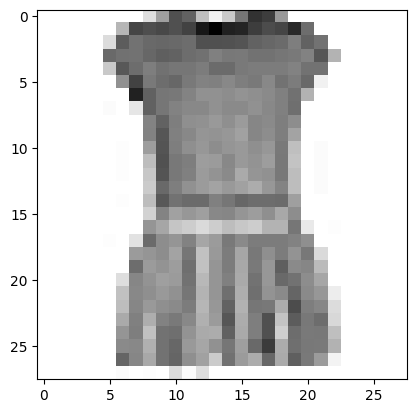

In [8]:
digit = X_train[3]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

(np.float64(-0.5), np.float64(27.5), np.float64(27.5), np.float64(-0.5))

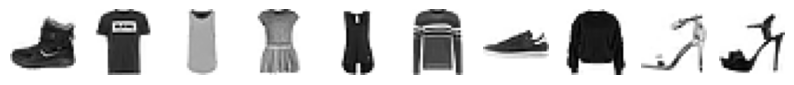

In [9]:
fig, axs = plt.subplots(1, 10, figsize=(10, 10))
for i in range(10):
    axs[i].imshow(X_train[i], cmap=plt.cm.binary)
    axs[i].axis('off')
    
plt.show()

### 이미지 데이터 전처리

In [10]:
# 차원 변환 및 정규화
X_train = X_train.reshape(-1, 28*28)
X_test = X_test.reshape(-1, 28*28)
X_train_scaled = X_train/255
X_test_scaled = X_test/255

X_train_scaled.shape
X_test_scaled.shape

(60000, 784)

(10000, 784)

### 원-핫 인코딩

In [11]:
y_train[:10] # 카테고리 값 

array([9, 0, 0, 3, 0, 2, 7, 2, 5, 5], dtype=uint8)

In [12]:
from keras.utils import to_categorical

y_train2 = to_categorical(y_train)
y_test2 = to_categorical(y_test)

In [13]:
y_train2[:10]

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.]])

In [14]:
np.unique(y_train)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

### 모델링

In [29]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf

tf.random.set_seed(3)

model = Sequential()
model.add(Dense(units=512, input_shape=(784,), activation="relu"))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
history = model.fit(X_train_scaled, y_train2,
                   # epochs=100, batch_size=128, # epochs = 10정도 이후부터는 과적합되기 시작함
                    epochs=10, batch_size=128,
                    validation_data=(X_test_scaled, y_test2)) # 학습 + 검증

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.7794 - loss: 0.6403 - val_accuracy: 0.8507 - val_loss: 0.4220
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8638 - loss: 0.3860 - val_accuracy: 0.8620 - val_loss: 0.3853
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8762 - loss: 0.3411 - val_accuracy: 0.8688 - val_loss: 0.3659
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8846 - loss: 0.3125 - val_accuracy: 0.8723 - val_loss: 0.3557
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8921 - loss: 0.2928 - val_accuracy: 0.8793 - val_loss: 0.3401
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.8992 - loss: 0.2750 - val_accuracy: 0.8804 - val_loss: 0.3369
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9035 - loss: 0.2602 - val_accuracy: 0.8824 - val_loss: 0.3362
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9093 - loss: 0.2476 - val_accuracy: 0.

In [31]:
# 모델 평가 (결과 출력)
loss, accuracy = model.evaluate(X_test_scaled, y_test2)
print(f'정확도: {accuracy:.4f}, 손실: {loss:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8853 - loss: 0.3359 
정확도: 0.8835, 손실: 0.3426


In [32]:
# summary 확인
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           5,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,221,152 (4.66 MB)

 Trainable params: 407,050 (1.55 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 814,102 (3.11 MB)

### 결과 시각화

<Figure size 1800x600 with 0 Axes>

<Axes: >

<Axes: >

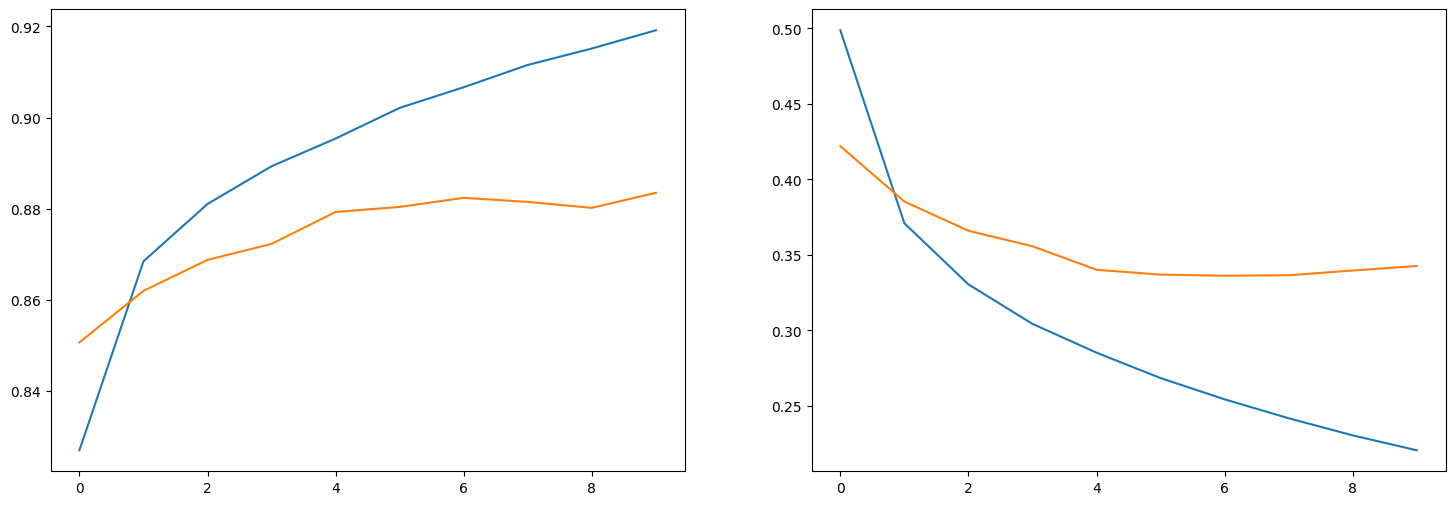

In [33]:
plt.figure(figsize=(18,6))
# history.history["loss"]
# history.history["accuracy"]
# history.history["val_loss"]
# history.history["val_accuracy"]
# 정확도
plt.subplot(1, 2, 1)
plt.plot(history.history["accuracy"], label= "accuracy")
plt.plot(history.history["val_accuracy"], label= "val_accuracy")

# 손실률
plt.subplot(1, 2, 2)
plt.plot(history.history["loss"], label= "loss")
plt.plot(history.history["val_loss"], label= "val_loss")
plt.show()

### 모델 저장 / 로드
- fashion_img_model.keras 파일명으로 저장

In [34]:
model.save('./model/fashion_img_model.keras')

In [35]:
from tensorflow.keras.models import load_model

# 모델 읽어오기
loaded_model = load_model('./model/fashion_img_model.keras')

### 예측 

In [36]:
y_pre_prob = loaded_model.predict(X_test_scaled, verbose=0)
y_pre_prob
y_pre_prob.shape
y_pre_prob[0]

array([[2.2349981e-07, 2.8049776e-08, 3.5741542e-07, ..., 1.5474791e-02,
        1.8975997e-07, 9.8100889e-01],
       [2.3973972e-04, 5.5617918e-13, 9.9843508e-01, ..., 3.3666127e-15,
        3.2551589e-10, 4.3799044e-13],
       [1.8429370e-07, 9.9999964e-01, 6.6485033e-11, ..., 1.0853539e-13,
        1.8582417e-11, 1.1887222e-13],
       ...,
       [4.2202219e-06, 2.6661698e-10, 1.6963103e-06, ..., 3.2271052e-07,
        9.9998474e-01, 1.1902439e-11],
       [6.7297213e-07, 9.9988019e-01, 7.0343609e-10, ..., 1.2420346e-09,
        1.2046607e-07, 2.0396020e-09],
       [7.1162626e-06, 7.3288511e-06, 4.4377343e-06, ..., 9.7584748e-04,
        3.7760339e-05, 3.6644237e-06]], dtype=float32)

(10000, 10)

array([2.2349981e-07, 2.8049776e-08, 3.5741542e-07, 2.2891925e-06,
       4.7783178e-06, 3.5083548e-03, 3.9677733e-08, 1.5474791e-02,
       1.8975997e-07, 9.8100889e-01], dtype=float32)

In [37]:
y_pre_prob[0]

array([2.2349981e-07, 2.8049776e-08, 3.5741542e-07, 2.2891925e-06,
       4.7783178e-06, 3.5083548e-03, 3.9677733e-08, 1.5474791e-02,
       1.8975997e-07, 9.8100889e-01], dtype=float32)

In [38]:
# 최대확률값으로 예측값 결정
y_pred = y_pre_prob.argmax(axis=1)
y_pred[:10] # 예측값
y_test[:10] # 실제값

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)